In [1]:
import pandas as pd

df = pd.read_csv('Global Weather Repository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:
# Check missing values
df.isnull().sum()

# Fill missing values using forward fill
df.ffill(inplace=True)

In [3]:
# Convert all columns to numeric, forcing errors='coerce' to handle non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# Now compute Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Global Weather Repository.csv")

# Fill missing values for numerical columns with median (robust to outliers)
num_cols = [
    'temperature_celsius', 'wind_mph', 'humidity', 'pressure_mb', 
    'visibility_km', 'uv_index', 'gust_kph', 'precip_mm'
]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values for categorical columns with mode (most frequent value)
cat_cols = ['wind_direction', 'condition_text']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Fill missing values in air quality columns with mean (ensures smooth trends)
air_quality_cols = [
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_PM2.5', 
    'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide'
]
df[air_quality_cols] = df[air_quality_cols].fillna(df[air_quality_cols].mean())

# Drop non-essential columns (mostly text-based, not useful for forecasting)
df.drop(columns=[
    'country', 'location_name', 'timezone', 'last_updated', 
    'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase'
], inplace=True)

# Normalize numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), 
                         columns=df.select_dtypes(include=['number']).columns)

# Final check for any remaining missing values
print(df_scaled.isnull().sum())

# Save cleaned dataset
df_scaled.to_csv("cleaned_weather_data.csv", index=False)


latitude                        0
longitude                       0
last_updated_epoch              0
temperature_celsius             0
temperature_fahrenheit          0
wind_mph                        0
wind_kph                        0
wind_degree                     0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
moon_illuminat

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


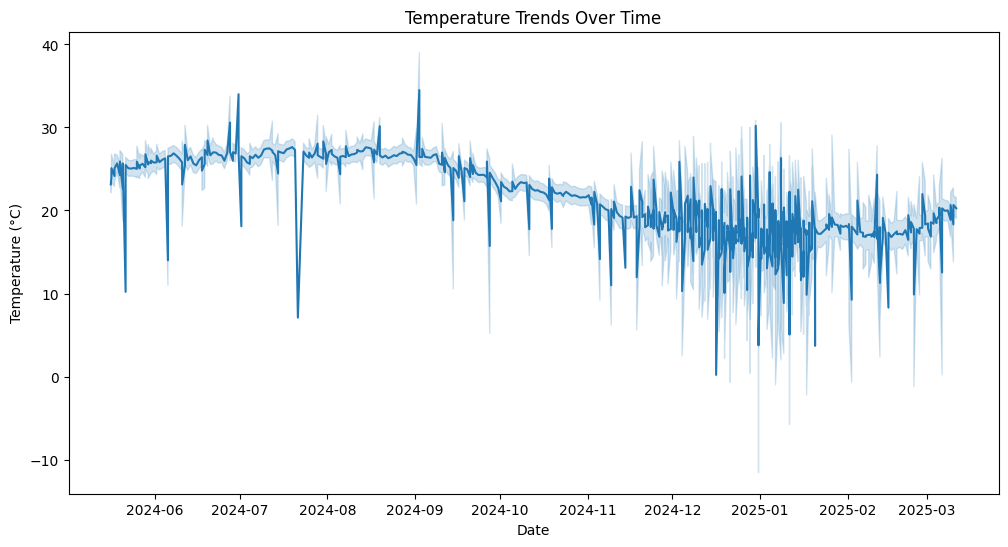

In [6]:
# Convert 'last_updated_epoch' to a datetime format
df['date'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# Now plot the temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temperature_celsius')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


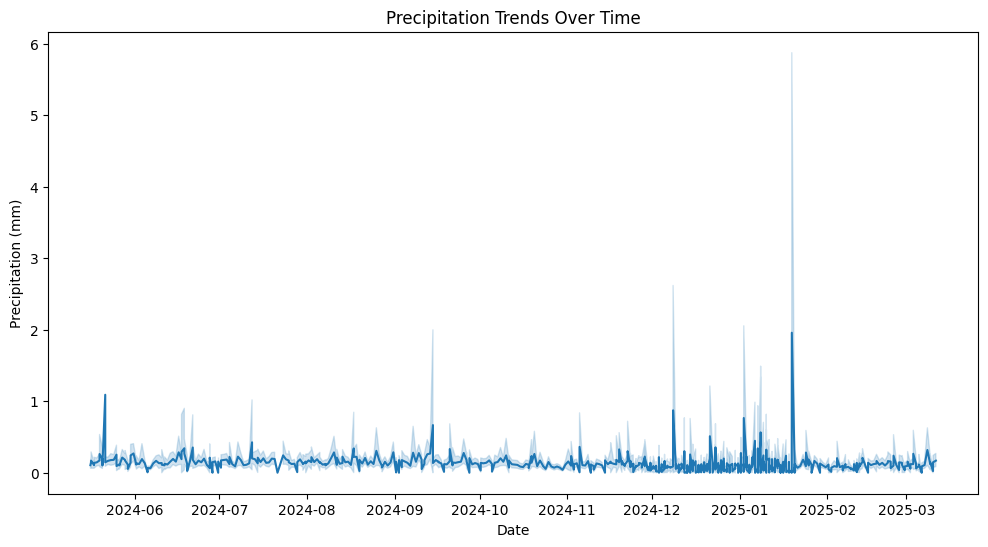

In [7]:
df = df.reset_index()  # Move 'date' from index to a regular column

# Convert 'last_updated_epoch' to datetime format
df['date'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# Sort by date
df = df.sort_values('date')

# Plot precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='precip_mm')
plt.title('Precipitation Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

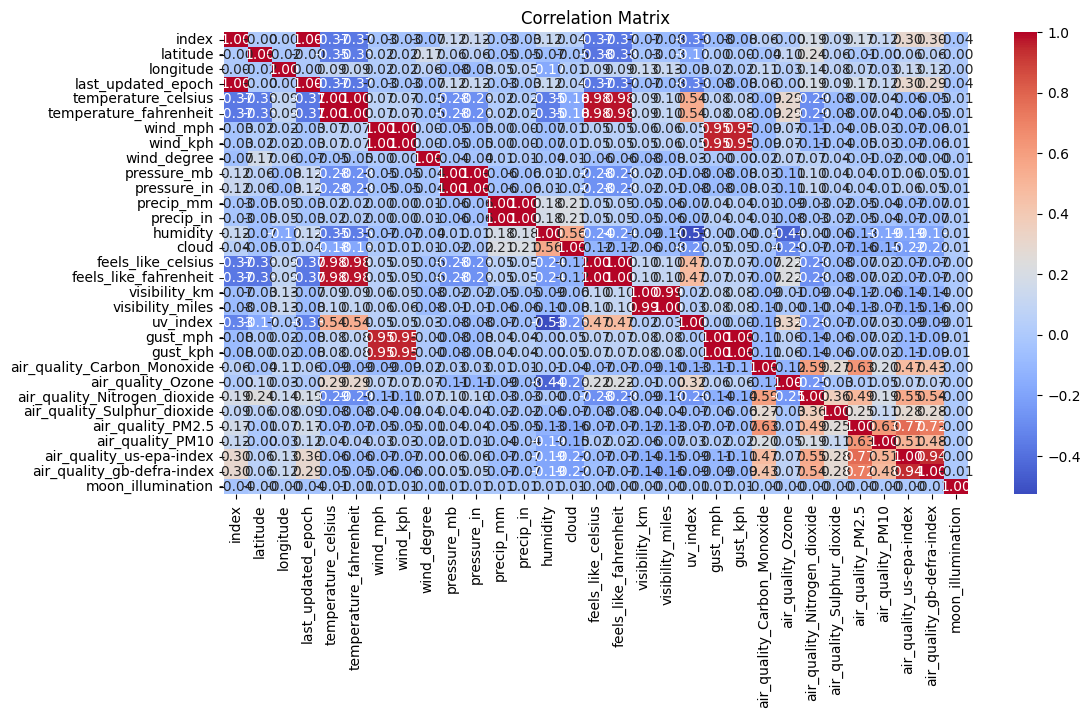

In [8]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Selected Features: ['temperature_fahrenheit', 'feels_like_fahrenheit', 'feels_like_celsius', 'latitude', 'longitude']
Training Set Size: (46460, 5)
Test Set Size: (11615, 5)


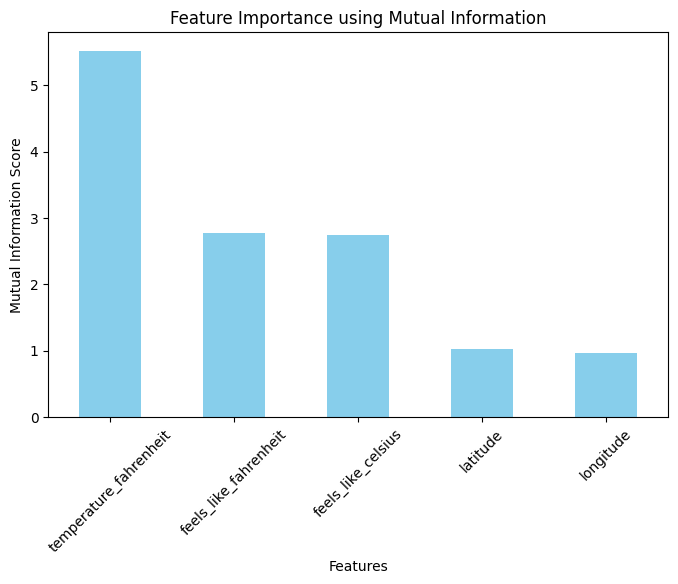

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Cleaned_Weather_Data.csv"
df = pd.read_csv(file_path)

# Convert to lower-memory dtypes
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')

# Define target variable
target = "temperature_celsius"

# Selecting numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if "last_updated_epoch" in numerical_features:
    numerical_features.remove("last_updated_epoch")  # Remove timestamp

# Compute Mutual Information for feature selection
X = df[numerical_features].drop(columns=[target])
y = df[target]

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Select only the **Top 5 Features**
selected_features = mi_scores.head(5).index.tolist()
print("Selected Features:", selected_features)

# Train-test split
X_selected = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

# Visualizing the selected features' importance
plt.figure(figsize=(8, 5))
mi_scores[selected_features].plot(kind="bar", color="skyblue")
plt.title("Feature Importance using Mutual Information")
plt.ylabel("Mutual Information Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()


In [10]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load cleaned dataset (update the file path if needed)
file_path = "Cleaned_Weather_Data.csv"
df = pd.read_csv(file_path)

# Selected features after feature selection
selected_features = ['temperature_fahrenheit', 'feels_like_fahrenheit', 'feels_like_celsius', 'latitude', 'longitude']
target = "temperature_celsius"

# Splitting data into train and test sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} R² Score: {score:.4f}")

# Find the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]
best_model = models[best_model_name]  # Retrieve the actual model

print(f"\nBest Model: {best_model_name} with R² Score: {best_model_score:.4f}")
joblib.dump(best_model, "./best_weather_model.pkl")  # Save in the current directory



Linear Regression R² Score: 1.0000
Decision Tree R² Score: 1.0000
Random Forest R² Score: 1.0000
Gradient Boosting R² Score: 0.9999
XGBoost R² Score: 0.9994

Best Model: Random Forest with R² Score: 1.0000


['./best_weather_model.pkl']

In [19]:
import pandas as pd
import joblib

# Load the saved best model
loaded_model = joblib.load("best_weather_model.pkl")

# Example new data (update values as needed)
new_data = pd.DataFrame({
    "temperature_fahrenheit": [80],
    "feels_like_fahrenheit": [78],
    "feels_like_celsius": [26],
    "latitude": [40.7128],
    "longitude": [-74.0060]
})

# Predict temperature in Celsius
predicted_temp = loaded_model.predict(new_data)
print(f"Predicted Temperature (°C): {predicted_temp[0]:.2f}")


Predicted Temperature (°C): 2.78


In [22]:
!pip install tensorflow


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned dataset
file_path = "Cleaned_Weather_Data.csv"  # Update with your actual path
df = pd.read_csv(file_path)

# Define target variable
target = "temperature_celsius"

# Selecting numerical features only
selected_features = ['temperature_fahrenheit', 'feels_like_fahrenheit', 'feels_like_celsius', 'latitude', 'longitude']

# Extract features and target
X = df[selected_features]
y = df[target].values.reshape(-1, 1)  # Ensure y is 2D for scaling

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)

# Save only the datasets
np.save("X_lstm.npy", X_scaled)
np.save("y_lstm.npy", y_scaled)

print("LSTM dataset saved separately!")


LSTM dataset saved separately!


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the saved datasets
X = np.load("X_lstm.npy")
y = np.load("y_lstm.npy")

# Reshape X for LSTM (samples, timesteps, features)
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Adding time step dimension

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

print("LSTM Data Shape:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


LSTM Data Shape:
X_train: (46460, 1, 5) X_test: (11615, 1, 5)
y_train: (46460, 1) y_test: (11615, 1)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 5)),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained LSTM model
model.save("lstm_weather_model.h5")

print("LSTM Model Trained and Saved Successfully!")


E:\Projects\Weather-Trend-Forecasting\Weather-Trend-Forecasting\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0392 - mae: 0.0887 - val_loss: 5.8554e-05 - val_mae: 0.0059
Epoch 2/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 3.0680e-05 - mae: 0.0039 - val_loss: 3.5512e-06 - val_mae: 0.0014
Epoch 3/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.4805e-06 - mae: 0.0014 - val_loss: 2.1518e-06 - val_mae: 0.0011
Epoch 4/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 2.9137e-06 - mae: 0.0013 - val_loss: 4.1428e-06 - val_mae: 0.0018
Epoch 5/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.4432e-06 - mae: 0.0015 - val_loss: 5.9264e-06 - val_mae: 0.0022
Epoch 6/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 3.0999e-06 - mae: 0.0014 - val_loss: 9.4670e-07 - val_mae: 7.3253e-04
Epoch 7/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.7150e-06 - mae: 0.0013 - val_loss: 7.5823e-07 - val_mae: 6.5589e-04
Epoch 8/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.7305e-06 - mae: 0.0013 - val_los

LSTM Model Trained and Saved Successfully!


In [36]:
from sklearn.metrics import r2_score

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Reshape predictions and actual values
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Compute R² score
r2_train = r2_score(y_train_flat, y_pred_train)
r2_test = r2_score(y_test_flat, y_pred_test)

print(f"LSTM R² Score (Train): {r2_train:.4f}")
print(f"LSTM R² Score (Test): {r2_test:.4f}")


1452/1452 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 
LSTM R² Score (Train): 0.9999
LSTM R² Score (Test): 0.9999


In [37]:
import joblib
import tensorflow as tf
import keras.losses

# Load Random Forest model
rf_model = joblib.load("./best_weather_model.pkl")

# Load LSTM model with custom loss function
lstm_model = tf.keras.models.load_model("lstm_weather_model.h5", custom_objects={"mse": keras.losses.MeanSquaredError()})

print("Models loaded successfully!")


Models loaded successfully!


In [38]:
import numpy as np

# Get predictions from Random Forest
# Reshape X_test for Random Forest
X_rf_test = X_test.reshape(X_test.shape[0], -1)  # Convert to 2D

# Get predictions from Random Forest
rf_preds = rf_model.predict(X_rf_test)
 

# Get predictions from LSTM
lstm_preds = lstm_model.predict(X_test)  
lstm_preds = lstm_preds.reshape(-1)  # Reshape to match RF output  

# Weighted ensemble (adjust weights if needed)
alpha = 0.6  # Weight for LSTM
beta = 0.4   # Weight for Random Forest

ensemble_preds = (alpha * lstm_preds) + (beta * rf_preds)

# Evaluate ensemble performance
from sklearn.metrics import r2_score

ensemble_r2 = r2_score(y_test, ensemble_preds)
print(f"Ensemble R² Score: {ensemble_r2:.4f}")


E:\Projects\Weather-Trend-Forecasting\Weather-Trend-Forecasting\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 
Ensemble R² Score: 0.9999


In [39]:
print("Random Forest R²:", r2_score(y_test, rf_preds))
print("LSTM R²:", r2_score(y_test, lstm_preds))
print("Ensemble R²:", r2_score(y_test, ensemble_preds))


Random Forest R²: 0.9995603464551667
LSTM R²: 0.9999166722118593
Ensemble R²: 0.9998953738801709


In [40]:
import numpy as np

# Get LSTM predictions
lstm_preds = lstm_model.predict(X_test)

# Reshape if necessary (depends on your model output shape)
lstm_preds = np.squeeze(lstm_preds)  


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [45]:
lstm_preds = scaler_y.inverse_transform(lstm_preds.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - lstm_preds) / y_test)) * 100

# Accuracy
accuracy = 100 - mape
print(f"LSTM Accuracy: {accuracy:.2f}%")


LSTM Accuracy: 95.61%
